## Observations and Insights

1. When observing the linear regression, you can see that there is a positive linear regression when plotted on the scatter   plot graph. 


2. Capomullin and Ramicane seem to be the most effective in reducing tumor size while Infubinol and Ceftamin were not. 


3. When looking at the bar plot, you can see that Capomullin and Ramicane have the most data points for each treatment. 

## Dependencies and starter code

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [52]:

# created another row to te see if file is readable
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [53]:
# created another row to te see if file is readable, was getting error before... 
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [29]:
# Combine the data into a single dataset
merge_df= pd.merge(mouse_metadata, study_results, on="Mouse ID" ,how="left")
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment

#grouping
regimen_group=merge_df.groupby(["Drug Regimen"])
regimen_group

#mean 
regimen_mean = regimen_group["Tumor Volume (mm3)"].mean()
#median 
regimen_median = regimen_group["Tumor Volume (mm3)"].median()
#variance 
regimen_variance = regimen_group["Tumor Volume (mm3)"].var()
#standard   
regimen_std = regimen_group["Tumor Volume (mm3)"].std()
#SEM AKA Standard Error of Measurment  
regimen_sem = regimen_group["Tumor Volume (mm3)"].sem() 


summary_table_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem}) 

summary_table_stats




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Data Points')

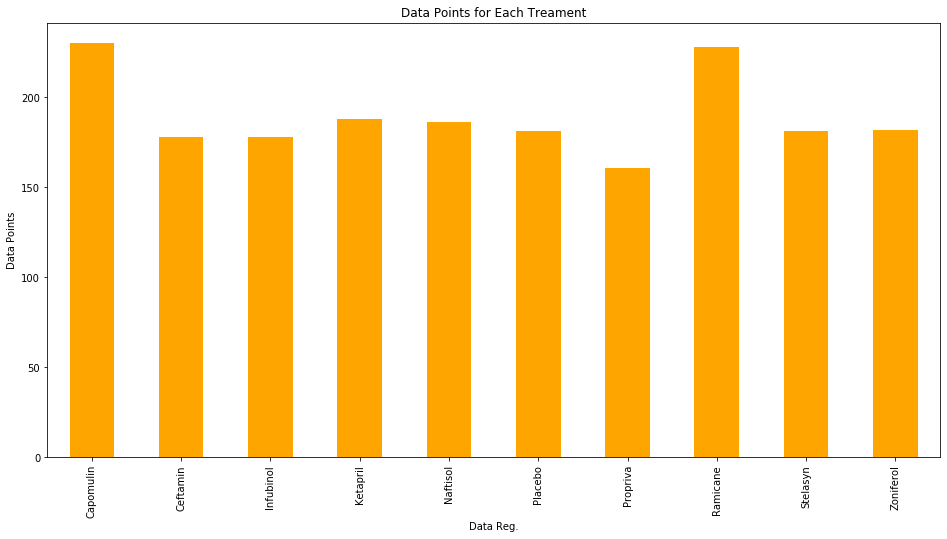

In [31]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas 

regimen_plot_points=merge_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

regimen_plot_points

regimen_plot_points.plot(kind="bar",color='orange',figsize=(16,8))
                         
plt.title  ("Data Points for Each Treament")
plt.xlabel ("Data Reg.")                     
plt.ylabel ("Data Points")




Text(0, 0.5, 'Data Points')

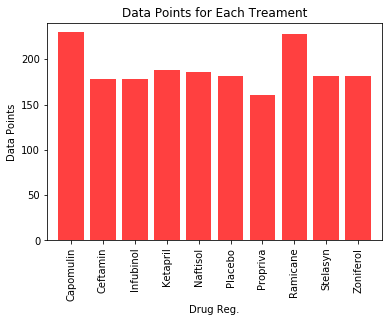

In [32]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot 

# points
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]


x_axis = np.arange(len(regimen_plot_points))

plt.bar(x_axis, users, color='r', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 
                            
                            'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points for Each Treament")
plt.xlabel("Drug Reg.")
plt.ylabel("Data Points")

## Pie plots

In [33]:
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female

groupby_gender = merge_df.groupby(["Mouse ID","Sex"])

groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())


mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]


mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]


mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


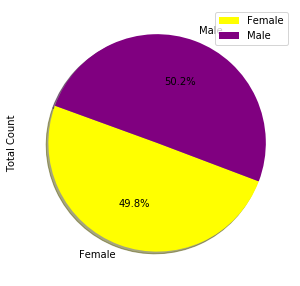

In [34]:
colors = ['yellow', 'purple']

explode = (0.0, 0)

plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=160, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1000791940320744,
 1.1016630746735625,
 -1.1017685314144796,
 1.1009347297692742)

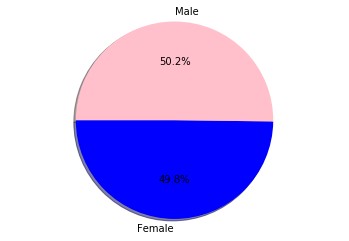

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]

sizes = [49.799197,50.200803]

colors = ['blue', 'pink']

explode = (0, 0)
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)

#Set equal axis
plt.axis("equal")

## Quartiles, outliers and boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
capomulin_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin", :]

capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [37]:
capolast = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capolastvol = pd.DataFrame(capolast)
capolastmerge = pd.merge(capolastvol, merge_df, on=("Mouse ID","Timepoint"),how="left")
capolastmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [38]:
tumors1 = capolastmerge["Tumor Volume (mm3)"]
quartiles = tumors1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")


Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [39]:
ramicanelast = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicanelastvol = pd.DataFrame(ramicanelast)
ramicanelastmerge = pd.merge(ramicanelastvol, merge_df, on=("Mouse ID","Timepoint"),how="left")
ramicanelastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [40]:
#Ramicane
tumors2 = ramicanelastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [41]:
infubinollast = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinolvol = pd.DataFrame(infubinollast)
infubinollastmerge = pd.merge(infubinolvol, merge_df, on=("Mouse ID","Timepoint"),how="left")
infubinollastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [42]:
#Infubinol
tumors3 = infubinollastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [43]:

ceftaminlast = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftaminlastvol = pd.DataFrame(ceftaminlast)
ceftaminlastmerge = pd.merge(ceftaminlastvol, merge_df, on=("Mouse ID","Timepoint"),how="left")
ceftaminlastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [44]:

#Ceftamin
tumors4 = ceftaminlastmerge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


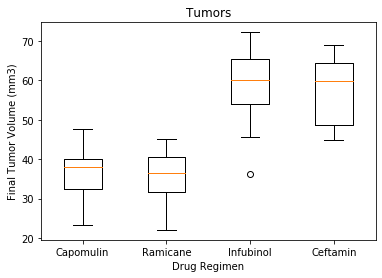

In [45]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

data_to_plot = [tumors1, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()

## Line and scatter plots

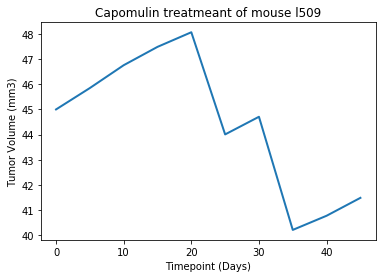

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
line_df.head()

x_axisTimePoint = line_df["Timepoint"]

tumorsvol = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTimePoint, tumorsvol,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

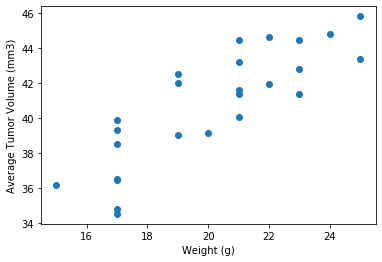

In [47]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulinavg = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulinavg['Weight (g)'],capomulinavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


In [48]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corelation=round(st.pearsonr(capomulinavg['Weight (g)'],capomulinavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corelation}")

The correlation between mouse weight and average tumor volume is 0.84


In [49]:

model=st.linregress(capomulinavg['Weight (g)'],capomulinavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

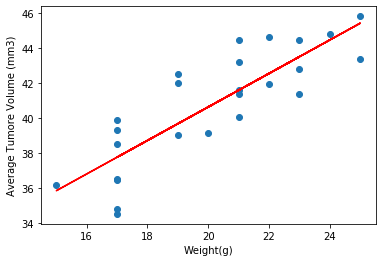

In [50]:

mslope = 0.9544396890241045
bintercept = 21.552160532685015
y_values = capomulinavg['Weight (g)']*mslope+bintercept
plt.scatter(capomulinavg['Weight (g)'],capomulinavg['Tumor Volume (mm3)'])
plt.plot(capomulinavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()
